In [535]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
%matplotlib inline

In [536]:
data = pd.read_csv("xclara_min.csv")
data.head() 

,V1,V2
0,71.04987,-2.683244
1,83.78762,26.497330
2,74.85747,-5.059505
3,77.72216,6.093524
4,68.97789,-4.123292


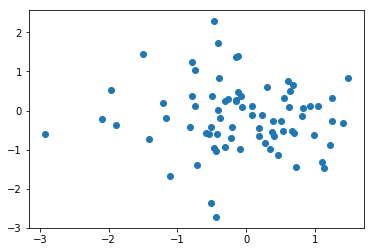

In [537]:
df = pd.DataFrame(np.random.randn(100, 2))
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
X = np.array(train)
plt.scatter(X[:,0],X[:,1], label='True Position')  

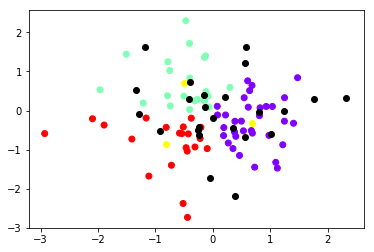

In [538]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(train)
centrs = kmeans.cluster_centers_
X = np.array(train)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(centrs[:,0],centrs[:,1], c='yellow', cmap='rainbow')  
X1 = np.array(test)
plt.scatter(X1[:,0],X1[:,1], label='True Position', c = 'black')

In [539]:
def distance(instance1, instance2):
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2) 
    return np.linalg.norm(instance1 - instance2)

In [540]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [541]:
dists = []

def getNearestDot(X, item, clusters):
    min = 100
    itr = 0
    for iterr in range(len(X)):
        trydist = distance(X[iterr], item)
        if trydist < min:
            min = trydist
            itr = iterr
        #print(iterr, item, trydist)
    return [min, itr, clusters[itr]]

def recalcCnts(C, X, labels):
    k = 0
    while k < 3:
        C_old = np.zeros(C.shape)
        error = dist(C, C_old, None)
        while error != 0:
            C_old = C
            points = [X[j] for j in range(len(X)) if labels[j] == k]
            C = np.mean(points, axis=0)
            error = dist(C, C_old, None)
        k += 1
    return centrs
trains = X
labs = kmeans.labels_
centrs2 = centrs
for item in X1:
    min, itr, cent = getNearestDot(trains, item, labs)
    np.append(trains, item)
    np.append(labs, cent)
    centrs2 = recalcCnts(centrs2, trains, labs)

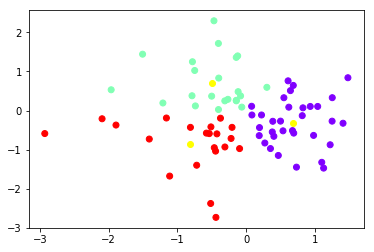

In [542]:
plt.scatter(trains[:,0],trains[:,1], c=labs, cmap='rainbow')  
plt.scatter(centrs2[:,0],centrs2[:,1], c='yellow', cmap='rainbow')  